# 5xFAD MEPs

In [4]:
from tqdm import tqdm
from openephysextract.extractor import Extractor
from openephysextract.preprocess import Preprocessor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

plt.style.use(['science', 'grid', 'vibrant'])

## defining relevant folders and paths

In [2]:
test = '/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/MICE_EEG_2024 (93-102).csv'
full = '/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/MICE_EEG_2024 (93-257).csv'

spreadsheet = pd.read_csv(full)

master_folder = '/Volumes/STORAGE 1.0/UNIC Research/Motor Evoked Potentials/MEPSSEP_raw_data/post 93'
test_folder = '/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test'

spreadsheet

,session,animalID,cage,ear,phenotype,phenoCode,subrec,sessionClass,sessionType,currentLevel,stim_lvl,isoflo,trials_from,trials_to,notes
0,2024-03-07_18-03-10,A571,NaN,NaN,5XFAD,2.0,1.0,MEP,sciatic,1.49,thr,1.9,1.0,60,'A571 sciatic at threshold of 1.49mA 50us pulse'
1,2024-03-07_18-04-31,A571,NaN,NaN,5XFAD,2.0,1.0,MEP,sciatic,2.25,1.5x,1.9,1.0,60,'A571 sciatic at 1.5x thr 2.25mA 50us pulse'
2,2024-03-07_18-11-10,A571,NaN,NaN,5XFAD,2.0,1.0,MEP,spine_hump,2.25,thr,1.9,1.0,60,'A571 spine hump at thr 2.75mA 200us pulse'
3,2024-03-07_18-12-24,A571,NaN,NaN,5XFAD,2.0,1.0,MEP,spine_hump,4.12,1.5x,1.9,1.0,60,'A571 spine hump at 1.5xthr 4.12mA 200us pulse'
4,2024-03-07_18-26-03,A573,NaN,NaN,5XFAD,2.0,1.0,MEP,sciatic,3.37,thr,1.9,1.0,60,'A573 sciatic at 3.37mA 50us pulseA573 sciatic...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2024-03-09_17-48-26,A572,NaN,NaN,5XFAD,2.0,1.0,MEP,skull_needles,6.00,max,1.9,1.0,60,'A572 LECB skull 6mA 200us 5 pulses'
161,2024-03-09_17-53-55,A571,NaN,NaN,5XFAD,2.0,1.0,MEP,skull_needles,4.14,thr,1.9,1.0,60,'A571 RECB skull 4.14mA 200us 5 pulses'
162,2024-03-09_17-55-40,A571,NaN,NaN,5XFAD,2.0,1.0,MEP,skull_needles,6.20,1.5x,1.9,1.0,60,'A571 RECB skull 6.2mA 200us 5 pulses'
163,2024-03-09_18-06-40,A573,NaN,NaN,5XFAD,2.0,1.0,MEP,skull_needles,3.00,thr,1.9,1.0,60,'A573 thr skull 3mA 5 pulses 200usA573 thr sku...


## extracting MEP matrices for all trials

In [3]:
# list to store each trial
sampling_rate = 30000

all_extracted = []

n = len(spreadsheet)
for i in tqdm(range(0, n), desc="Processing trials"):
    if spreadsheet['sessionType'][i] == 'reject':
        continue
    else:
        # relevant information
        notes = spreadsheet.loc[i]
        
        # defining extractor object
        extractor = Extractor(
            master_folder=master_folder, 
            notes=notes,
            recording_channels=[5, 7],
            sampling_rate=sampling_rate,
            pre_stimulus_ms=10,
            post_stimulus_ms=100)
        
        # extracting relevant data
        extracted = extractor.lazy(event_channel=13, export=True)
    
        all_extracted.append(extracted)

Processing trials:   0%|          | 0/165 [00:00<?, ?it/s]


PermissionError: [Errno 13] Permission denied: '/Volumes/STORAGE 1.0'

In [ ]:
# saving extracted data
with open('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/extracted.pkl', 'wb') as f:
    pickle.dump(all_extracted, f)

In [6]:
# loading extracted data
extract_location = '/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/extracted.pkl'

with open(extract_location, 'rb') as f:
    extracted = pickle.load(f)

In [7]:
extracted[0].keys()

dict_keys(['trial', 'notes', 'events', 'data'])

## trial classification and peak detection

In [8]:
%reload_ext autoreload

from viewer import Viewer

viewer = Viewer(extracted = extracted, sampling_rate=30000)

viewer.classifier()

Output()

HTML(value='<br>')

Output(layout=Layout(width='80%'))

HTML(value='<br>')

In [95]:
viewer.extract()
accepted = viewer.accepted
unsure = viewer.unsure
rejected = viewer.rejected

with open('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/accepted.pkl', 'wb') as f:
    pickle.dump(accepted, f)

with open('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/unsure.pkl', 'wb') as f:
    pickle.dump(unsure, f)

with open('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/rejected.pkl', 'wb') as f:
    pickle.dump(rejected, f)

accepted_indices = viewer.accepted_indices
unsure_indices = viewer.unsure_indices
rejected_indices = viewer.rejected_indices

classified_indices = {'accepted': accepted_indices, 'unsure': unsure_indices, 'rejected': rejected_indices}

with open('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/classified_indices.pkl', 'wb') as f:
    pickle.dump(classified_indices, f)

In [1]:
with open('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/classified/accepted.pkl', 'rb') as f:
    accepted = pickle.load(f)

with open('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/classified/unsure.pkl', 'rb') as f:
    unsure = pickle.load(f)

with open('/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials Test/classified/unsure.pkl', 'rb') as f:
    classified_indices = pickle.load(f)

NameError: name 'pickle' is not defined

In [4]:

accepted[0]['notes']['phenoCode']

2.0

In [3]:

final = []

for trial in accepted:

    group = int(trial['notes']['phenoCode'])
    stim_type = trial['notes']['sessionType']
    positive_peaks = trial.get('positive peaks')
    negative_peaks = trial.get('negative peaks')

    if positive_peaks and negative_peaks:
        
        positive_peaks = sorted(positive_peaks, key=lambda x: x[0])
        negative_peaks = sorted(negative_peaks, key=lambda x: x[0])
        
        delay_pos, amplitude_pos = positive_peaks[0]
        delay_neg, amplitude_neg = negative_peaks[0]
        
        delay_pos = (delay_pos / 30) - 10  # convert to milliseconds
        delay_neg = (delay_neg / 30) - 10  # convert to milliseconds
        
        if delay_pos and delay_neg:
            delay = (delay_pos + delay_neg)/2
        else:
            delay = sorted([delay_pos, delay_neg], key = lambda x: x[0])[0]
        
        amplitude = amplitude_pos + amplitude_neg
        
        if amplitude:
            final.append({'delay':delay, 'amplitude': amplitude, 'group': group, 'stim_type': stim_type})
    else:
        continue
    

final = pd.DataFrame(final)

final.head()

,delay,amplitude,group,stim_type
0,1.733333,41.496929,2,sciatic
1,1.700000,80.281767,2,sciatic
2,3.200000,8.987951,2,spine_hump
3,3.516667,-43.449300,2,spine_hump
4,2.100000,-25.799323,2,sciatic


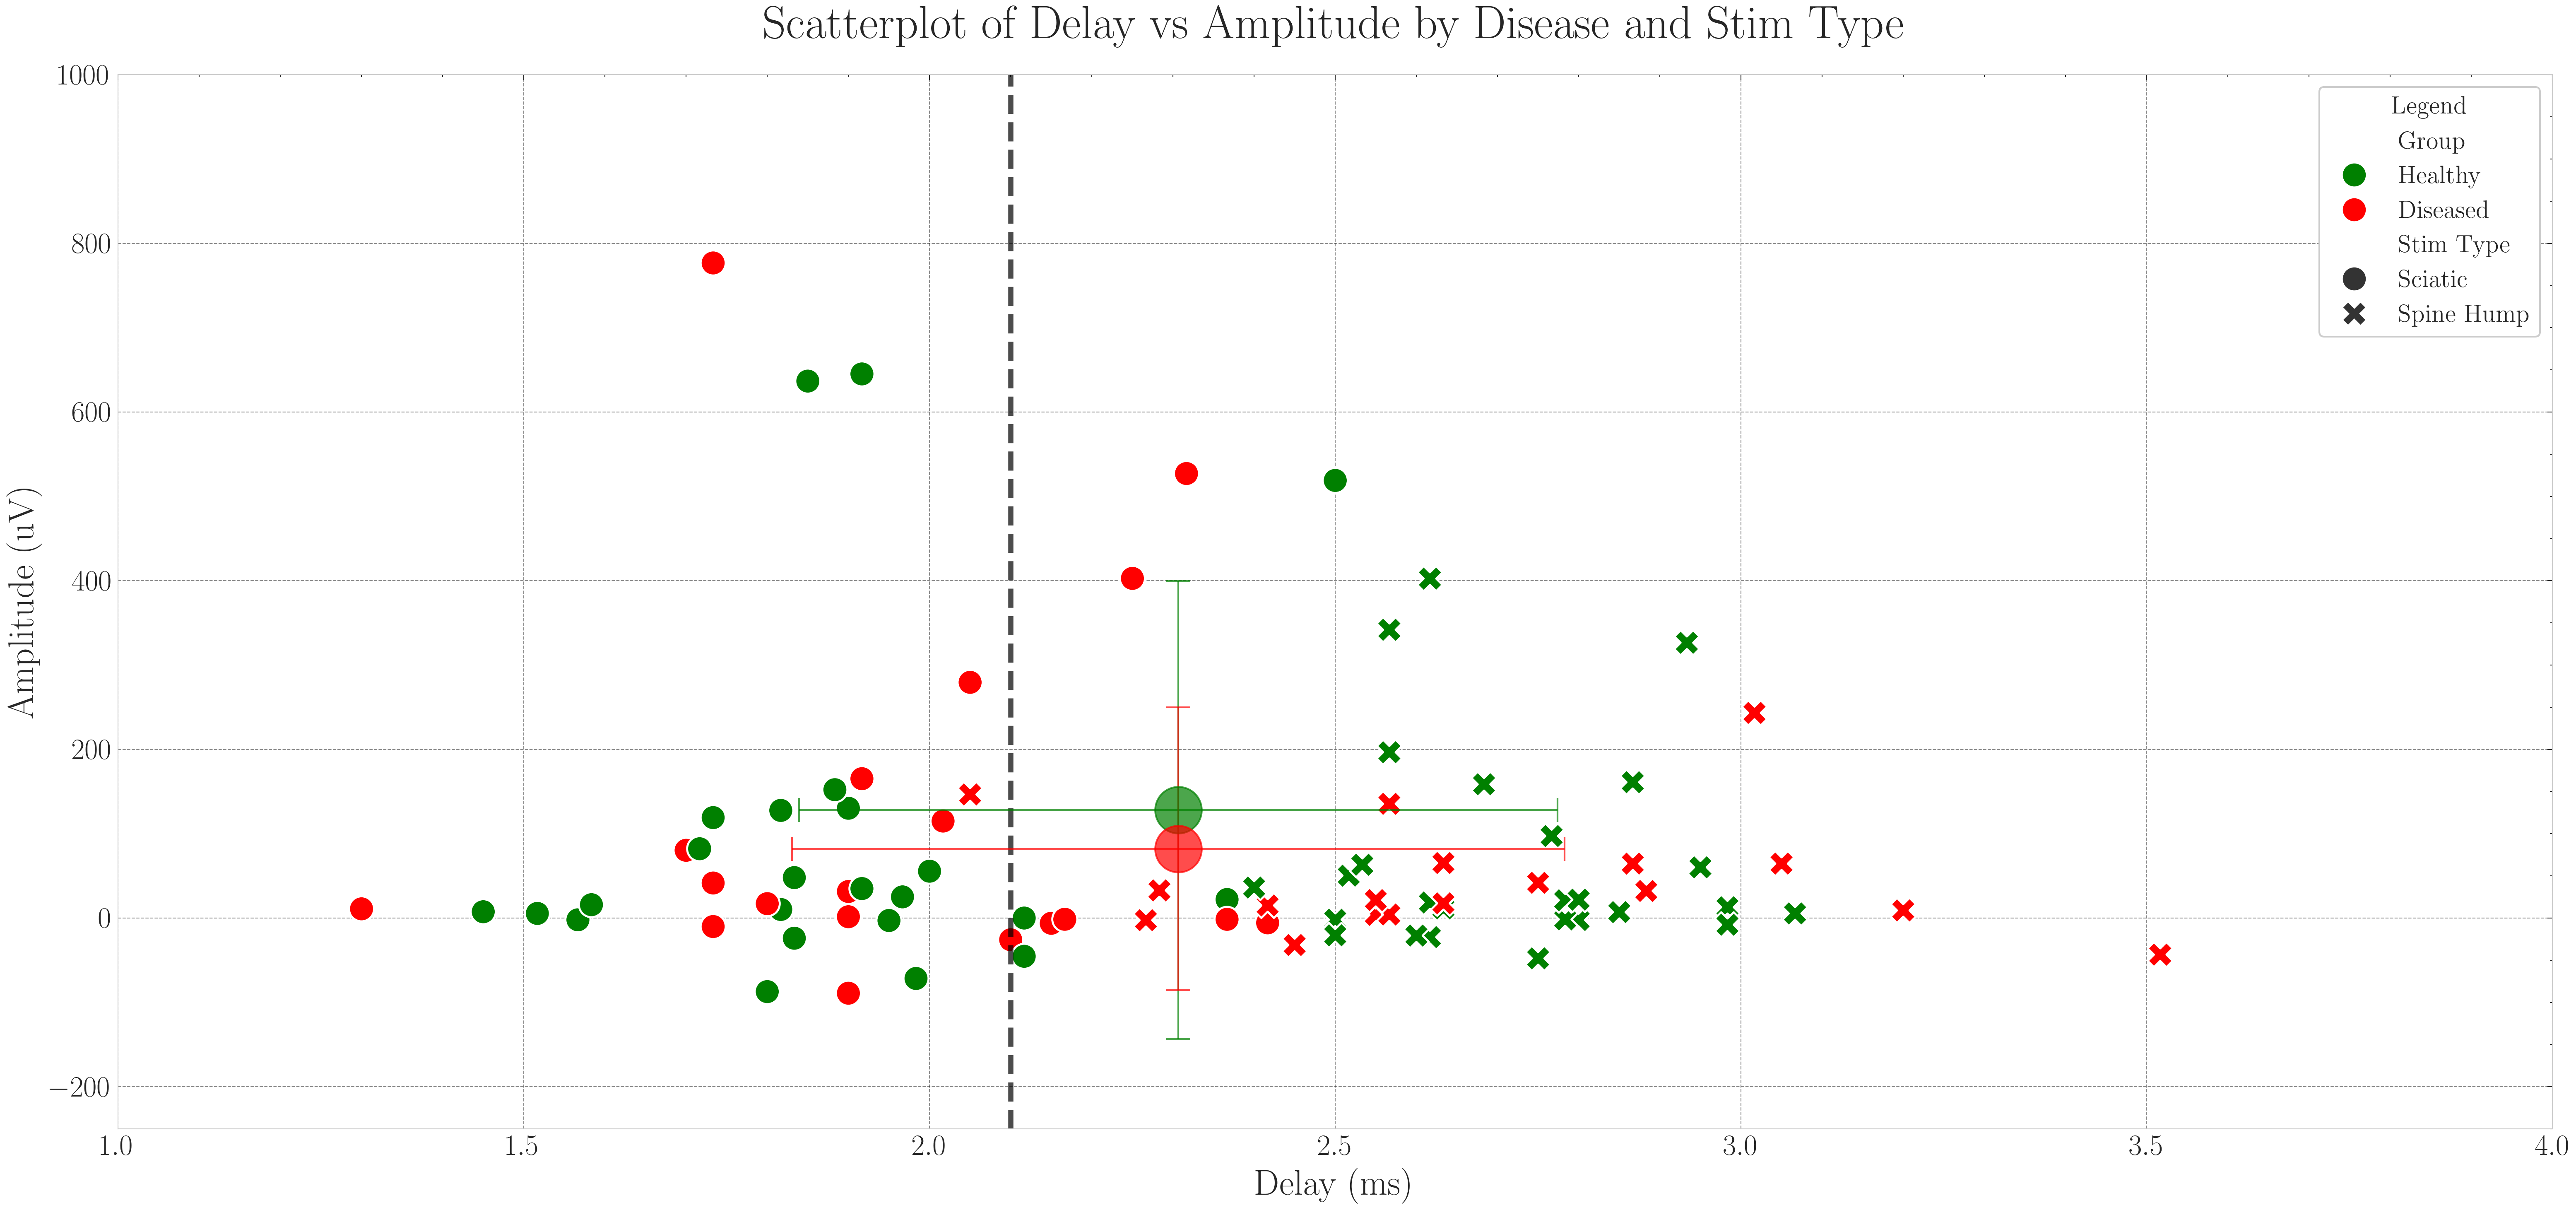

In [20]:
import seaborn as sns

plt.rc('figure', titlesize = 33, figsize = (21, 7))
plt.rc('axes', titlesize = 27, labelsize = 21, titlepad = 21)
plt.rc('xtick', labelsize = 17)
plt.rc('ytick', labelsize = 17)

plt.figure(figsize=(21, 10), dpi=300)

custom_palette = {1: "green", 2: "red"}
plt.style.use(['science','grid', 'vibrant'])

# Scatterplot as before
sns.scatterplot(
    data=final,
    x='delay',
    y='amplitude',
    hue='group',
    style='stim_type',
    palette=custom_palette,
    s=210
)

# Vertical line for expected delay
plt.axvline(x=2.1, color='black', linestyle='--', linewidth=3, alpha=0.7)

# Compute centroids and error bars (using standard deviation as error)
centroids = final.groupby('group').agg(
    delay_mean=('delay', 'mean'),
    delay_std=('delay', 'std'),
    amplitude_mean=('amplitude', 'mean'),
    amplitude_std=('amplitude', 'std')
).reset_index()

# Plot centroid with error bars for each group
for idx, row in centroids.iterrows():
    plt.errorbar(
        x=row['delay_mean'],
        y=row['amplitude_mean'],
        xerr=row['delay_std'],
        yerr=row['amplitude_std'],
        fmt='o',
        color=custom_palette.get(int(row['group']), 'blue'),
        markersize=27,
        capsize=7,
        capthick=1,
        alpha=0.7
    )

# Titles and labels
plt.title("Scatterplot of Delay vs Amplitude by Disease and Stim Type")
plt.xlabel("Delay (ms)")
plt.ylabel("Amplitude (uV)")
plt.xlim(1, 4)
plt.ylim(-250, 1000)

# Legend mapping
my_map = {
    'group': 'Group',
    '1': 'Healthy',
    '2': 'Diseased',
    'stim_type': 'Stim Type',
    'sciatic': 'Sciatic',
    'spine_hump': 'Spine Hump',
}

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [my_map.get(l, l) for l in labels],
          title='Legend', title_fontsize='large', fontsize='large', loc='best')

plt.tight_layout()
plt.show()


## statistical tests

In [103]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

group1_delays = final[final['stim_type'] == "sciatic"]['delay']
group2_delays = final[final['stim_type'] == "spine_hump"]['delay']

shapiro_group1 = shapiro(group1_delays)
shapiro_group2 = shapiro(group2_delays)

print("Shapiro-Wilk test for Group 1 Delays: p-value =", shapiro_group1.pvalue)
print("Shapiro-Wilk test for Group 2 Delays: p-value =", shapiro_group2.pvalue)

# Determine if the data is normally distributed based on p-value > 0.05
if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
    # If data are approximately normal, use independent samples t-test
    t_stat, p_value = ttest_ind(group1_delays, group2_delays, equal_var=False)  # Welch's t-test
    print('Amplitudes are normally distributed')
    print("Independent t-test p-value:", p_value)
else:
    # If data are not normally distributed, use Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(group1_delays, group2_delays, alternative='two-sided')
    print('Delays are not normally distributed')
    print("Mann-Whitney U test p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("The difference in amplitude between Group 1 and Group 2 is statistically significant.")
else:
    print("No statistically significant difference in amplitude between Group 1 and Group 2.")


Shapiro-Wilk test for Group 1 Delays: p-value = 0.5133216766004308
Shapiro-Wilk test for Group 2 Delays: p-value = 0.4057904088081926
Amplitudes are normally distributed
Independent t-test p-value: 3.680454415212293e-24
The difference in amplitude between Group 1 and Group 2 is statistically significant.


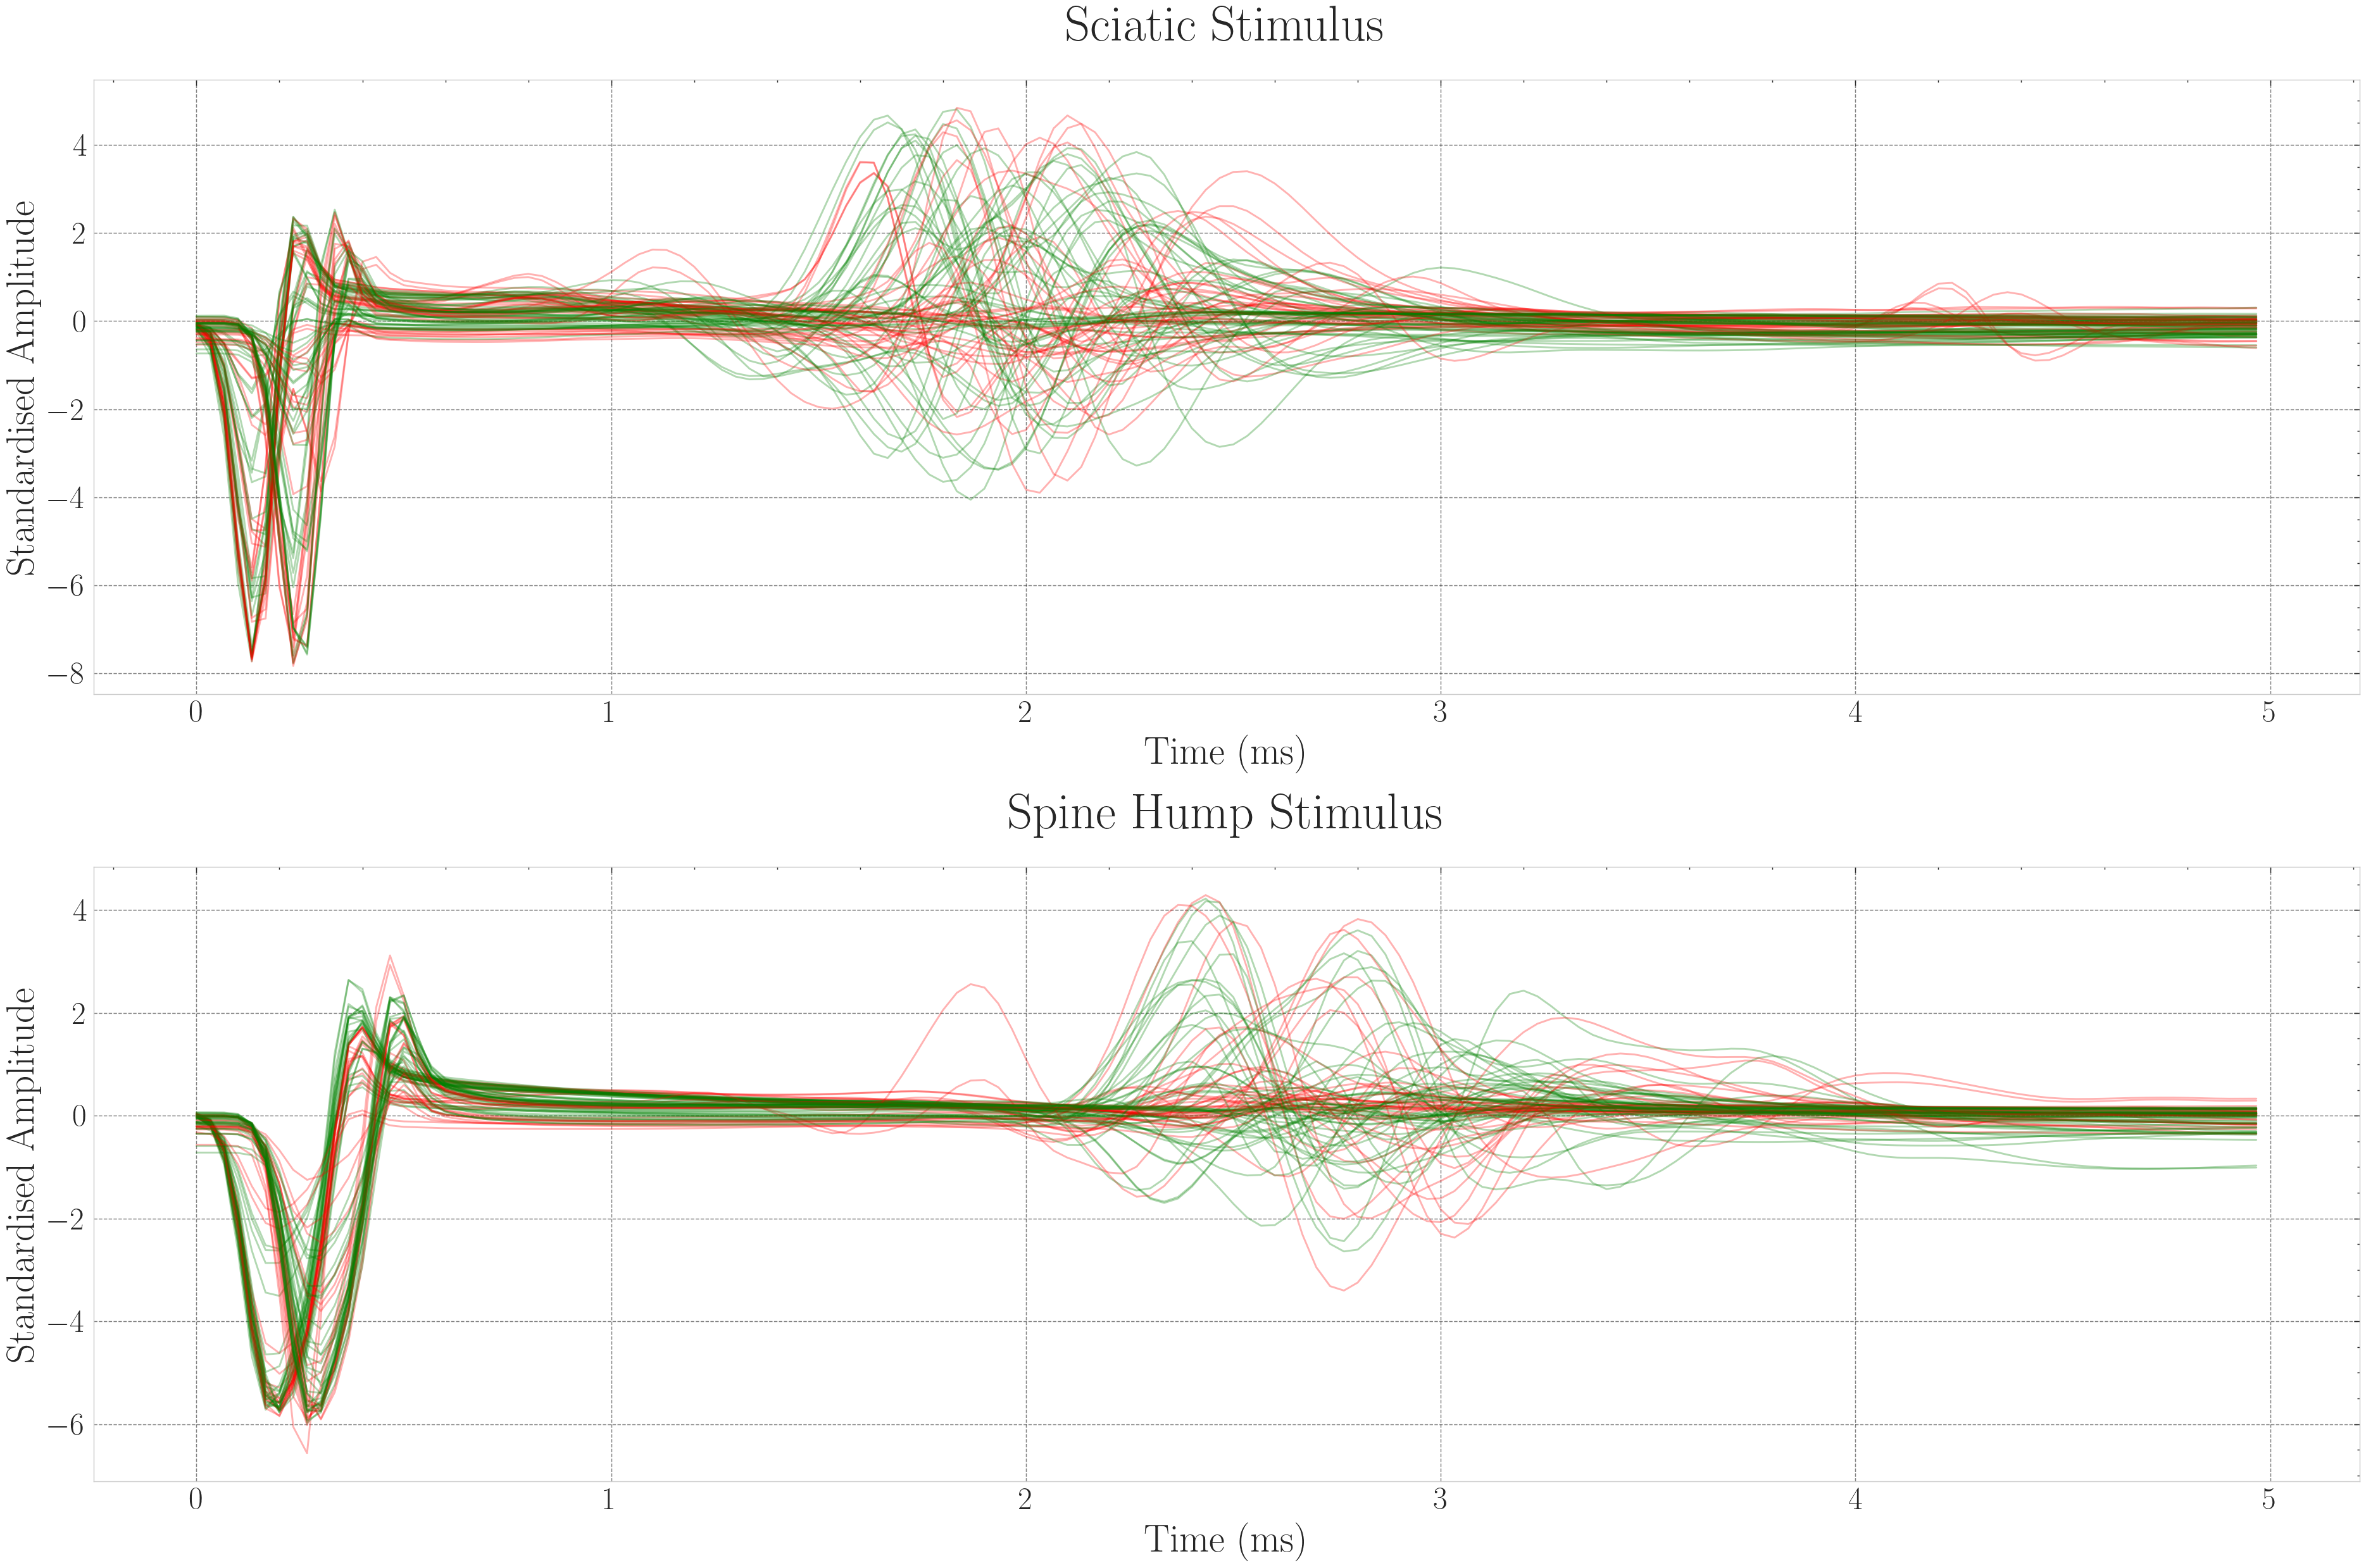

In [31]:
from matplotlib.colors import ListedColormap
from scipy.ndimage import gaussian_filter1d as gf

plt.style.use(['science', 'grid'])
plt.rc('figure', titlesize = 33, figsize = (21, 7))
plt.rc('axes', titlesize = 27, labelsize = 21, titlepad = 21)
plt.rc('xtick', labelsize = 17)
plt.rc('ytick', labelsize = 17)

fig, ax = plt.subplots(2, 1, figsize=(18, 12), dpi=210)

colors = ListedColormap(['green', 'red'])

count = 0
start, stop = 300, 450

time_in_ms = np.arange(start, stop) * (1/30) - 10

for trial in accepted:

    temp = trial['data']
    notes = trial['notes']
    current = notes['currentLevel']
    group = int(notes['phenoCode'])
    stim_type = notes['sessionType']

    for channel in range(temp.shape[0]):

        # current correction
        data = temp[channel, start:stop, :]
        current_matrix = np.array(current)[np.newaxis, np.newaxis]
        data = data/current_matrix

        # baseline correction
        baseline = temp[channel, :300, :].mean(axis=1).mean(axis=0)
        data = data - baseline

        # event mean and std
        mean_events = (data.mean(axis=1)).flatten()
        std_events = (data.std(axis=1)).flatten()

        # smooth signal
        smoothed_mean = gf(mean_events, sigma=1.25)
        smoothed_std = gf(std_events, sigma=1.25)
    # 
        mean = (smoothed_mean - smoothed_mean.mean())/smoothed_mean.std()
    
        if stim_type == 'sciatic' and group == 1:
            ax[0].plot(time_in_ms, mean, color='green', alpha=0.3)
        elif stim_type == 'sciatic' and group == 2:
            ax[0].plot(time_in_ms, mean, color='red', alpha=0.3)
        elif stim_type == 'spine_hump' and group == 1:
            ax[1].plot(time_in_ms, mean, color='green', alpha=0.3)
        elif stim_type == 'spine_hump' and group == 2:
            ax[1].plot(time_in_ms, mean, color='red', alpha=0.3)
        else:
            continue
        count+=1
_
ax[0].set_title('Sciatic Stimulus')
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('Standardised Amplitude')
ax[1].set_title('Spine Hump Stimulus')
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Standardised Amplitude')

plt.tight_layout()
plt.show()
        